In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# the following line only works in an IPython notebook
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [10]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import os

In [11]:
rawframes = pims.ImageSequence('E:\ActiveMatter\ShortPNGs\*.tif', as_grey=True)

In [12]:
rawframes

<Frames>
Source: E:\ActiveMatter\ShortPNGs\*.tif
Length: 1526 frames
Frame Shape: (480, 640, 3)
Pixel Datatype: uint8

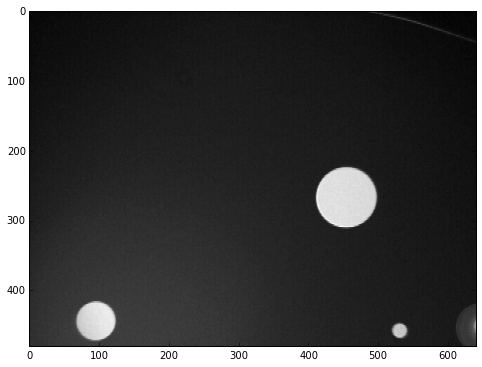

In [13]:
plt.imshow(rawframes[0])

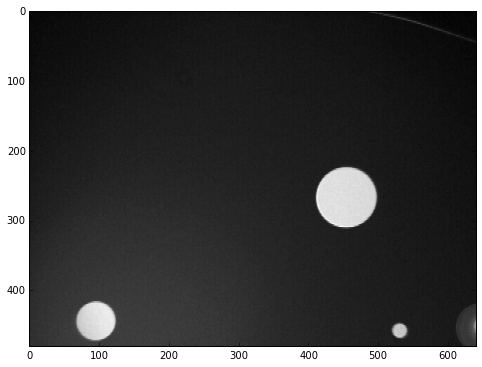

In [15]:
def crop(img):
    """
    Crop the image to select the region of interest
    """
    x_min = 45
    x_max = -35
    y_min = 100
    y_max = -300 
    return img[:,:]

frames = pims.ImageSequence('E:\ActiveMatter\ShortPNGs\*.tif', process_func=preprocess_foam)
plt.imshow(rawframes[0])

In [58]:
from scipy import ndimage
from skimage import morphology, util, filter
from skimage.color import rgb2gray


def preprocess_foam(img):
    """
    Apply image processing functions to return a binary image
    """
    #Greyscale
    img=rgb2gray(img)
    # Crop the pictures as for raw images.
    img = crop(img)
    # Apply thresholds
    img = filter.threshold_adaptive(img, 300)
    threshold = 0.15
    idx = img > img.max() * threshold
    idx2 = img < img.max() * threshold
    img[idx] = 0
    img[idx2] = 255
    # Dilatate to get a continous network
    # of liquid films
    #img = ndimage.binary_dilation(img)
    #img = ndimage.binary_dilation(img)
    return util.img_as_int(img)


frames = pims.ImageSequence('E:\ActiveMatter\ShortPNGs\*.tif', process_func=preprocess_foam)

In [59]:
frames

<Frames>
Source: E:\ActiveMatter\ShortPNGs\*.tif
Length: 1526 frames
Frame Shape: (480, 640, 3)
Pixel Datatype: uint8

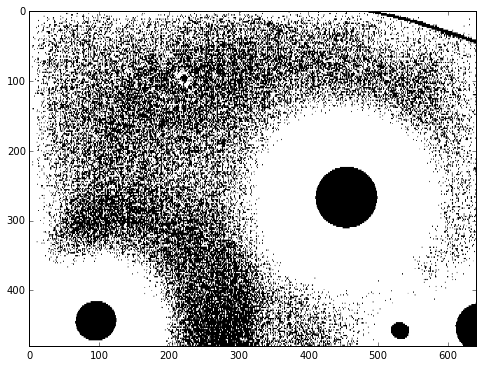

In [60]:
plt.imshow(frames[0])

Continue working from custom feature detection example notebook.

In [7]:
f = tp.locate(frames[0], 101, invert=False)

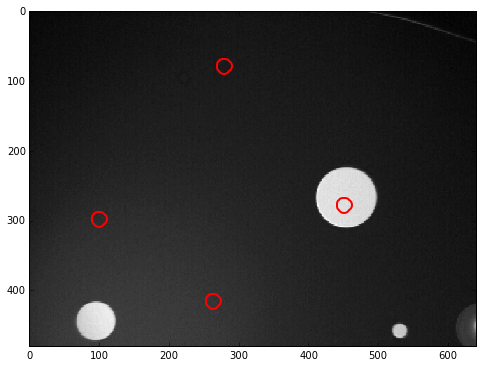

In [8]:
plt.figure()  # make a new figure
tp.annotate(f, frames[0])

[<matplotlib.text.Text at 0xc01d630>, <matplotlib.text.Text at 0xcd416d8>]

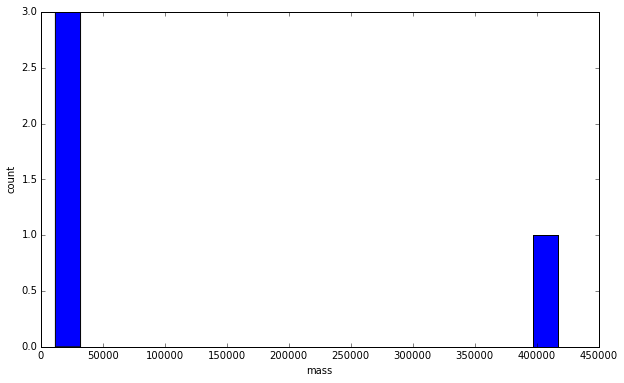

In [9]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

Has problems tracking large particles in default state. Can be fixed.